In [1]:
#Version Numbers Used to Generate this Pset:
#seaborn=0.11.2
#scipy==1.8.0
#numpy==1.22.2
#matplotlib==3.5.1

import scipy as sp
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import collections
from IPython.display import clear_output
import random
import openpyxl

sns.set_style("ticks")


In [3]:
80%60

20

In [12]:
i%60

19

350


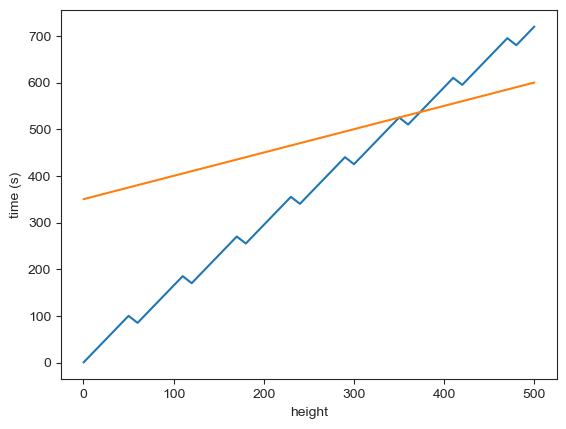

In [28]:
from pylab import *
import numpy as np
from matplotlib import pyplot as plt

r_up=2
r_down=-1.5
h=[0]
h_cong=[350]
for i in range(500):
    if h[-1]==h_cong[-1] :
        print(i)
    if (i%60 < 50):
        h.append(h[i]+r_up)
        
    else:
        h.append(h[i]+r_down)
    h_cong.append(h_cong[i]+0.5)
        
        
plt.plot(range(501),np.array(h))
plt.plot(range(501),np.array(h_cong))
plt.xlabel("height")
plt.ylabel("time (s)")
plt.show()

In [2]:
Coalescence_data_path ="Analyzed/processed_CoalescenceEvent_synthetic.xlsx"
Communities_data_path ="Analyzed/processed_Communities_synthetic.xlsx"
Coalescence_recipe_path="Postprocessed/CoalescenceRecipe.xlsx"
Meta_data_path="Postprocessed/Metadata.xlsx"
Processed_sequences_path="Postprocessed/processed_Sequences.xlsx"

Coalescence_data=pd.read_excel(Coalescence_data_path)
Communities_data=pd.read_excel(Communities_data_path)
Coalescence_recipe=pd.read_excel(Coalescence_recipe_path)
Metadata=pd.read_excel(Meta_data_path)
Processed_sequences=pd.read_excel(Processed_sequences_path)
exception_list=['P4-23','P4-24']


In [3]:
def getIDX(data, IDX):
    O = np.flatnonzero([x == IDX for x in data['SampleIDX']])
    return O

def getAbundance(IDX):
    global Processed_sequences
    SampleIdx= np.flatnonzero([x == IDX for x in Processed_sequences['SampleIdx']])
    if not any(SampleIdx):
        return
    else:
        O=Processed_sequences.iloc[SampleIdx].values.tolist()[0][1:]
        return O

def CommunityPermutate(Timepoint, CommunityOrigin, Medium, CoalescenceType):
    global Metadata
    idx = np.where((Metadata['Timepoint'] == Timepoint) &
                   (Metadata['CommunityOrigin'] == CommunityOrigin) &
                   (Metadata['Medium'] == Medium) &
                   (Metadata['CoalescenceType'] == CoalescenceType))[0]
    O = np.concatenate(Metadata['SampleIDX'][idx])
    return O

def CommunityPermutate_withSpeciesPoolsize(Timepoint, CommunityOrigin, Medium, CoalescenceType, species_pool_num):
    global Metadata,exception_list
    idx = (Metadata['Timepoint'] == Timepoint) & \
          (Metadata['CommunityOrigin'] == CommunityOrigin) & \
          (Metadata['Medium'] == Medium) & \
          (Metadata['CoalescenceType'] == CoalescenceType)

    communityIDX = np.array([int(x) for x in Metadata['CommunityIDX']])
    if CoalescenceType == 'S':
        if species_pool_num == 6:
            idx = idx & (communityIDX <= 9)
        elif species_pool_num == 12:
            idx = idx & ((communityIDX > 9) & (communityIDX <= 18))
        elif species_pool_num == 24:
            idx = idx & ((communityIDX > 18) & (communityIDX <= 30))
    elif CoalescenceType == 'C':
        if species_pool_num == 6:
            idx = idx & (communityIDX <= 14)
        elif species_pool_num == 12:
            idx = idx & ((communityIDX > 14) & (communityIDX <= 41))
        elif species_pool_num == 24:
            idx = idx & ((communityIDX > 41) & (communityIDX <= 47))

    O = Metadata['SampleIDX'][idx]
    O = list(set(O) - set(exception_list))
    return O

In [7]:
mediums = ["LN", "MN", "HN"]
species_pools = [6, 12, 24]
Syn_Coal_IDX = {
    "LN_6": CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "C", 6),
    "LN_12": CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "C", 12),
    "LN_24": CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "C", 24),
    "MN_6": CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "C", 6),
    "MN_12": CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "C", 12),
    "MN_24": CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "C", 24),
    "HN_6": CommunityPermutate_withSpeciesPoolsize("F", "S", "H", "C", 6),
    "HN_12": CommunityPermutate_withSpeciesPoolsize("F", "S", "H", "C", 12),
    "HN_24": CommunityPermutate_withSpeciesPoolsize("F", "S", "H", "C", 24)
}
Syn_Sub_IDX = {
    "LN_6": CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "S", 6),
    "LN_12": CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "S", 12),
    "LN_24": CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "S", 24),
    "MN_6": CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "S", 6),
    "MN_12": CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "S", 12),
    "MN_24": CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "S", 24),
    "HN_6": CommunityPermutate_withSpeciesPoolsize("F", "S", "H", "S", 6),
    "HN_12": CommunityPermutate_withSpeciesPoolsize("F", "S", "H", "S", 12),
    "HN_24": CommunityPermutate_withSpeciesPoolsize("F", "S", "H", "S", 24)
}

In [8]:
CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "S", 6)
CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "S", 6)

['P8-67',
 'P8-63',
 'P8-52',
 'P8-66',
 'P8-61',
 'P8-64',
 'P8-53',
 'P8-55',
 'P8-49',
 'P8-65',
 'P8-56',
 'P8-54',
 'P8-57',
 'P8-51',
 'P8-69',
 'P8-50',
 'P8-68',
 'P8-62']

In [9]:
def getAbundance(Processed_sequences,IDX_list):
    IDX_list_=np.squeeze([np.where(Processed_sequences['SampleIDX']==x) for x in IDX_list])
    return (np.array(Processed_sequences.iloc[IDX_list_].values)[:,1:]).astype(float)

def getCommunities(Communities_data,IDX_list):
    IDX_list_=np.squeeze([np.where(Communities_data['SampleIDX']==x) for x in IDX_list])
    return (Communities_data.iloc[IDX_list_])

def getCoalescence(Coalescence_data,IDX_list):
    IDX_list_=np.squeeze([np.where(Coalescence_data['SampleIDX']==x) for x in IDX_list])#IDX_list_
    return (Coalescence_data.iloc[IDX_list_])

In [10]:
IDX_list=Syn_Sub_IDX['LN_6']
IDX_list_=np.squeeze([np.where(Processed_sequences['SampleIDX']==x) for x in IDX_list])
df=Processed_sequences.iloc[IDX_list_]
df

,SampleIDX,NormalizedAbundance1,NormalizedAbundance2,NormalizedAbundance3,NormalizedAbundance4,NormalizedAbundance5,NormalizedAbundance6,NormalizedAbundance7,NormalizedAbundance8,NormalizedAbundance9,...,NormalizedAbundance54,NormalizedAbundance55,NormalizedAbundance56,NormalizedAbundance57,NormalizedAbundance58,NormalizedAbundance59,NormalizedAbundance60,NormalizedAbundance61,NormalizedAbundance62,NormalizedAbundance63
17,P1-18,0.073288,0.000000,0.000000,0.000000,0.002468,0.000000,0.007526,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,P1-02,0.000000,0.352390,0.000000,0.296793,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,P1-13,0.000000,0.000000,0.003796,0.000000,0.000000,0.000000,0.447533,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,P1-01,0.000000,0.000000,0.004500,0.000000,0.000000,0.000000,0.384381,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,P1-14,0.000000,0.508969,0.000000,0.148095,0.000000,0.000000,0.002488,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,P1-09,0.238208,0.347144,0.000000,0.002025,0.000000,0.000000,0.006160,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,P1-19,0.000000,0.000000,0.000000,0.007175,0.341962,0.000000,0.017984,0.000000,0.000000,...,0.0,0.001998,0.013261,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,P1-05,0.390944,0.000000,0.000000,0.000000,0.000000,0.000000,0.050645,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,P1-04,0.000000,0.000000,0.000000,0.153615,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,P1-07,0.000000,0.000000,0.000000,0.000000,0.445386,0.000000,0.001624,0.000000,0.000000,...,0.0,0.001714,0.010643,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/jx/rq_jr02135l_jt9wtyd2x47c0000gn/T/ipykernel_57038/529960460.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


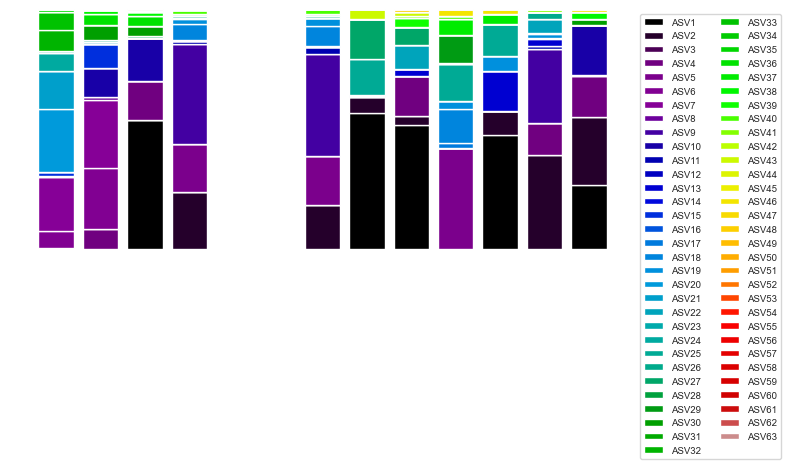

In [28]:
from cycler import cycler



fig=figure(num=None)
IDX_list=Syn_Coal_IDX['LN_6'][1:14]
IDX_list_=np.squeeze([np.where(Processed_sequences['SampleIDX']==x) for x in IDX_list])
df=Processed_sequences.iloc[IDX_list_]


degList = [i for i in df.columns if i[0:4]=='Norm']
degList_ = [i.replace('NormalizedAbundance','ASV') for i in degList]
bar_l = range(df.shape[0])

cm = plt.get_cmap('nipy_spectral')

f, ax = plt.subplots(1, figsize=(10,5))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg], bottom = bottom, label=degList_[i])
    bottom += df[deg].values

ax.set_xticks(bar_l)
#ax.set_xticklabels(df['INSTNM'].values, rotation=90, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=2, fontsize='x-small')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
    
f.subplots_adjust(right=0.75, bottom=0.4)
f.show()
f.savefig("Figures/APS/composition2.png", bbox_inches='tight')
plt.close(fig)


In [17]:
[i.replace('NormalizedAbundance','ASV') for i in degList]

['ASV1',
 'ASV2',
 'ASV3',
 'ASV4',
 'ASV5',
 'ASV6',
 'ASV7',
 'ASV8',
 'ASV9',
 'ASV10',
 'ASV11',
 'ASV12',
 'ASV13',
 'ASV14',
 'ASV15',
 'ASV16',
 'ASV17',
 'ASV18',
 'ASV19',
 'ASV20',
 'ASV21',
 'ASV22',
 'ASV23',
 'ASV24',
 'ASV25',
 'ASV26',
 'ASV27',
 'ASV28',
 'ASV29',
 'ASV30',
 'ASV31',
 'ASV32',
 'ASV33',
 'ASV34',
 'ASV35',
 'ASV36',
 'ASV37',
 'ASV38',
 'ASV39',
 'ASV40',
 'ASV41',
 'ASV42',
 'ASV43',
 'ASV44',
 'ASV45',
 'ASV46',
 'ASV47',
 'ASV48',
 'ASV49',
 'ASV50',
 'ASV51',
 'ASV52',
 'ASV53',
 'ASV54',
 'ASV55',
 'ASV56',
 'ASV57',
 'ASV58',
 'ASV59',
 'ASV60',
 'ASV61',
 'ASV62',
 'ASV63']